## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


### Load the dataset

In [5]:
# Load the dataset (replace the path with your local file path)
tips_df = pd.read_csv('tips.csv')  # Update with your file path


### 1. Make a list of categorical and numerical columns in the data.

In [6]:
categorical_cols = tips_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = tips_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['sex', 'smoker', 'day', 'time']
Numerical Columns: ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [7]:
avg_bill_per_day = tips_df.groupby('day')['total_bill'].mean()
print(avg_bill_per_day)


day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [8]:
avg_tip_by_gender = tips_df.groupby('sex')['tip'].mean()
print(avg_tip_by_gender)


sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


### 4. According to the data, were there more customers for dinner or lunch?

In [9]:
customer_counts = tips_df['time'].value_counts()
print(customer_counts)


time
Dinner    176
Lunch      68
Name: count, dtype: int64


### 5. Based on the statistical summary, comment on the variable 'tip'

In [10]:
print(tips_df['tip'].describe())


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


### 6. Find the busiest day in terms of the orders?

In [11]:
busiest_day = tips_df['day'].value_counts().idxmax()
print(busiest_day)


Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

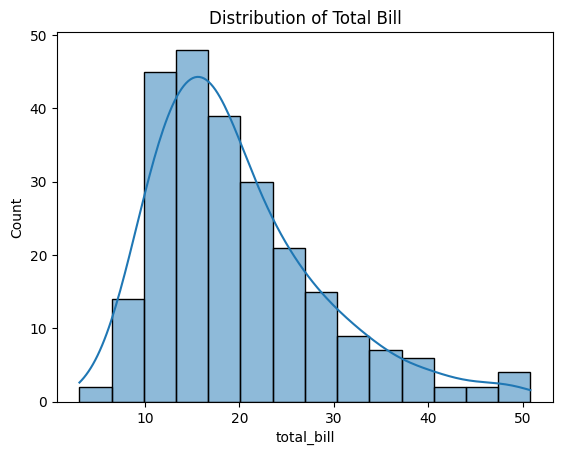

1.1332130376158205


In [12]:
sns.histplot(tips_df['total_bill'], kde=True)
plt.title('Distribution of Total Bill')
plt.show()
print(tips_df['total_bill'].skew())


### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

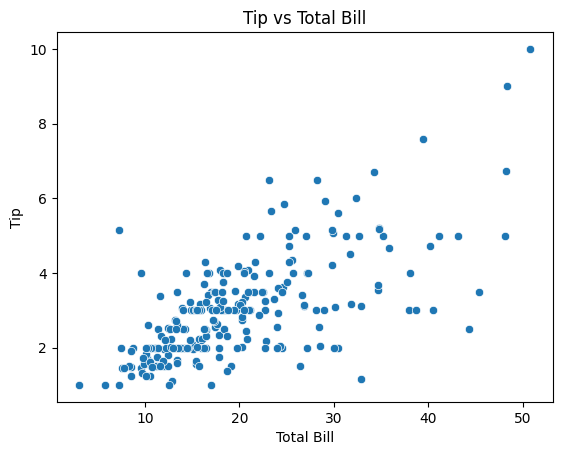

Correlation between Total Bill and Tip: 0.6757341092113641


In [13]:
sns.scatterplot(data=tips_df, x='total_bill', y='tip')
plt.title('Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

correlation = tips_df['total_bill'].corr(tips_df['tip'])
print("Correlation between Total Bill and Tip:", correlation)


### 9. What is the percentage of males and females in the dataset? and display it in the plot

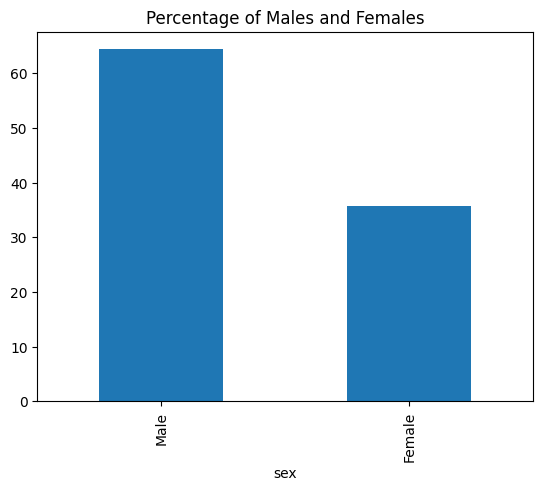

In [14]:
gender_counts = tips_df['sex'].value_counts(normalize=True) * 100
gender_counts.plot(kind='bar', title='Percentage of Males and Females')
plt.show()


### 10. Compute the gender-wise count based on smoking habits and display it in the plot

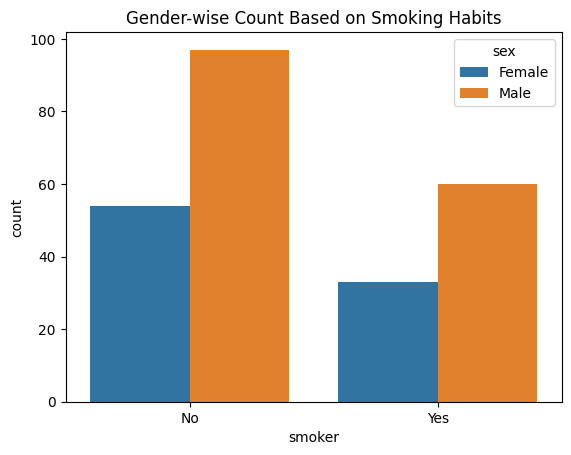

In [15]:
sns.countplot(data=tips_df, x='smoker', hue='sex')
plt.title('Gender-wise Count Based on Smoking Habits')
plt.show()


### 11. Compute the average tip amount given for different days and display it in the plot.

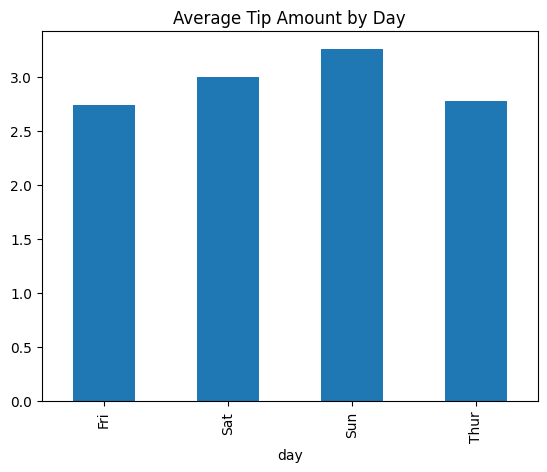

In [16]:
avg_tip_by_day = tips_df.groupby('day')['tip'].mean()
avg_tip_by_day.plot(kind='bar', title='Average Tip Amount by Day')
plt.show()


### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

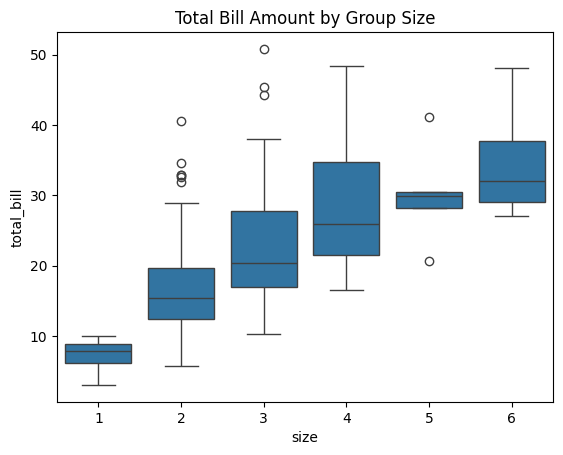

In [17]:
sns.boxplot(data=tips_df, x='size', y='total_bill')
plt.title('Total Bill Amount by Group Size')
plt.show()


### 13. Plot a horizontal boxplot to compare the bill amount based on gender

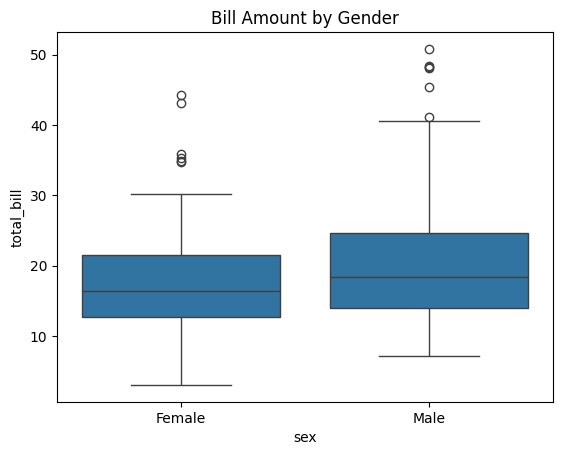

In [18]:
sns.boxplot(data=tips_df, x='sex', y='total_bill')
plt.title('Bill Amount by Gender')
plt.show()


### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [19]:
max_bill = tips_df[tips_df['day'].isin(['Sat', 'Sun'])].groupby(['day', 'time'])['total_bill'].max()
print(max_bill)


day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64


### 15. Compute the percentage of missing values in the dataset.

In [20]:
missing_percentage = tips_df.isnull().mean() * 100
print(missing_percentage)


total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [21]:
duplicate_count = tips_df.duplicated().sum()
print("Duplicate Records:", duplicate_count)
tips_df = tips_df.drop_duplicates()


Duplicate Records: 1


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

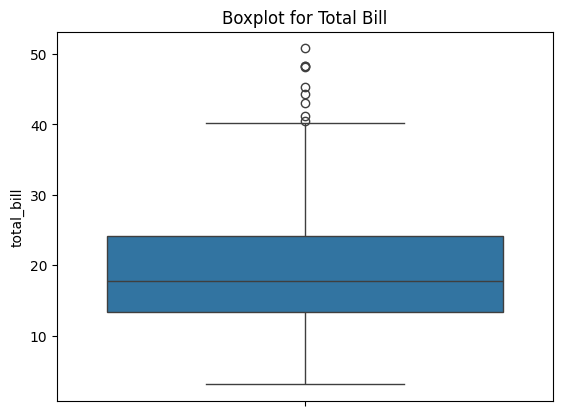

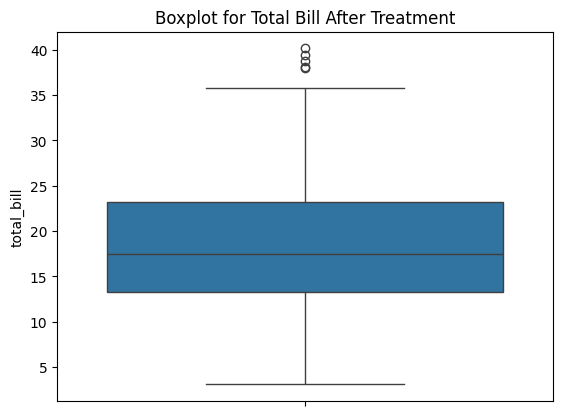

In [22]:
sns.boxplot(data=tips_df, y='total_bill')
plt.title('Boxplot for Total Bill')
plt.show()

# Treating outliers
Q1 = tips_df['total_bill'].quantile(0.25)
Q3 = tips_df['total_bill'].quantile(0.75)
IQR = Q3 - Q1
tips_df = tips_df[(tips_df['total_bill'] >= (Q1 - 1.5 * IQR)) & (tips_df['total_bill'] <= (Q3 + 1.5 * IQR))]

sns.boxplot(data=tips_df, y='total_bill')
plt.title('Boxplot for Total Bill After Treatment')
plt.show()


### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

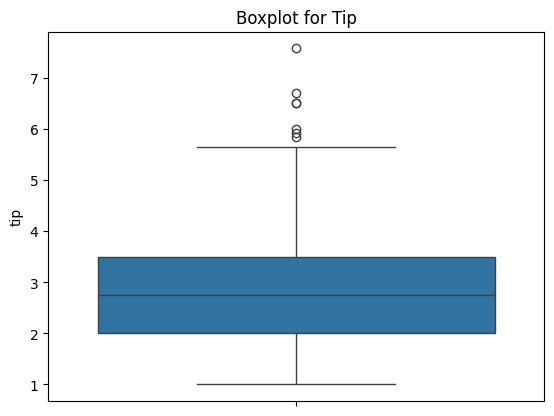

In [23]:
sns.boxplot(data=tips_df, y='tip')
plt.title('Boxplot for Tip')
plt.show()

Q1 = tips_df['tip'].quantile(0.25)
Q3 = tips_df['tip'].quantile(0.75)
IQR = Q3 - Q1
tips_df = tips_df[(tips_df['tip'] >= (Q1 - 1.5 * IQR)) & (tips_df['tip'] <= (Q3 + 1.5 * IQR))]


### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [24]:
tips_df = pd.get_dummies(tips_df, columns=categorical_cols, drop_first=True)
print(tips_df.sample(5))


     total_bill  tip  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
167       31.71  4.5     4      True       False    False     True     False   
93        16.32  4.3     2     False        True    False    False     False   
29        19.65  3.0     2     False       False     True    False     False   
92         5.75  1.0     2     False        True    False    False     False   
101       15.38  3.0     2     False        True    False    False     False   

     time_Lunch  
167       False  
93        False  
29        False  
92        False  
101       False  


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [25]:
total_bill_min = tips_df['total_bill'].min()
total_bill_max = tips_df['total_bill'].max()
print("Range of Total Bill:", total_bill_min, total_bill_max)

# Min-max scaling
tips_df['total_bill'] = (tips_df['total_bill'] - total_bill_min) / (total_bill_max - total_bill_min)


Range of Total Bill: 3.07 40.17


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [27]:
import pandas as pd

# Load the dataset
tips_df = pd.read_csv('tips.csv')  # Update with your file path

# i) Encode the categorical variables
tips_df = pd.get_dummies(tips_df, drop_first=True)  # Drop the first category to avoid dummy variable trap

# ii) Store the target column (tip) in the y variable and the rest of the columns in the X variable
y = tips_df['tip']  # Target variable
X = tips_df.drop('tip', axis=1)  # Features

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (244, 8)
Shape of y: (244,)


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
tips_df = pd.read_csv('tips.csv')  # Update with your file path

# Encode categorical variables
tips_df = pd.get_dummies(tips_df, drop_first=True)

# Store the target column and features
y = tips_df['tip']
X = tips_df.drop('tip', axis=1)

# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Standardize the 'total_bill' and 'size' columns
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

# Display the first few rows of the transformed training data
print(X_train.head())


     total_bill  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
234    0.217044   0.2      True        True     True    False     False   
227    0.326232   0.6      True       False     True    False     False   
180    0.641367   0.6      True        True    False     True     False   
5      0.433644   0.6      True       False    False     True     False   
56     0.715934   0.6      True        True     True    False     False   

     time_Lunch  
234       False  
227       False  
180       False  
5         False  
56        False  


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)


R-squared Value: 0.29309667441267384


### Happy Learning:)